# Problem 16.1: Electrical Gradient Network

##### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Set-up the model

Set the parameter values for the system

In [2]:
r1 = 1.
c1 = 1. 

Define the problem in State-Space model notation

In [3]:
a = np.array([[-2./(r1*c1), 1./(r1*c1), 0., 0., 0., 0., 0.],
              [1./(r1*c1),-2./(r1*c1), 1./(r1*c1), 0., 0., 0., 0. ],
              [0., 1./(r1*c1),-2./(r1*c1), 1/(r1*c1), 0., 0., 0.],
              [0., 0., 1./(r1*c1),-2./(r1*c1), 1./(r1*c1), 0., 0.],
              [0., 0., 0., 1./(r1*c1),-2./(r1*c1), 1./(r1*c1), 0.],
              [0., 0., 0., 0., 1./(r1*c1),-2./(r1*c1), 1./(r1*c1)],
              [0., 0., 0., 0., 0., 1./(r1*c1),-1./(r1*c1)]])

b = np.array([[1./(r1*c1)], [0.], [0.], [0.], [0.], [0.], [0.]])
c = np.array([[1., 0., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 0., 1., 0., 0.],
              [0., 0., 0., 0., 0., 1., 0.],
              [0., 0., 0., 0., 0., 0., 1.]])
d = np.array([[0.], [0.], [0.], [0.], [0.], [0.], [0.]])

In [4]:
a

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -1.]])

Make a State-Space model with the matrices defined. 

In [5]:
sys = sig.StateSpace(a, b, c, d)
print("System in State-Space is: ",sys)
systf=sig.StateSpace.to_tf(sys)
print("System in transfer functions are: ",systf)

System in State-Space is:  StateSpaceContinuous(
array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -1.]]),
array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]),
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]]),
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]),
dt: None
)
System in transfer functions are:  TransferFunctionContinuous(
array([[ 1.00000000e+00,  1.10000000e+01,  4.50000000e+01,
         8.40000000e+01,  7.00000000e+01,  2.10000000e+01,
  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


### Analysing the Model (frequency and stability)

Chacking the stability of the system by dertermining the eigenvalues of the A-matrix. 

In [6]:
weig = np.linalg.eigvals(a)
print('The eigenvalues of the A-matrix are: ',weig)

The eigenvalues of the A-matrix are:  [-3.82709092 -3.33826121 -2.61803399 -1.79094307 -1.         -0.0437048
 -0.38196601]


#### Transform the State-Space Model to Transfer Function Models

For this system we only make the transformation for the first and the last stage. 

In [7]:
tf1a=sig.TransferFunction(systf.num[0],systf.den)
tf1f=sig.TransferFunction(systf.num[6],systf.den)
print('The first transferfunction is: ',tf1f)
zpk1a = tf1a.to_zpk()
zpk1f = tf1f.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpk1f)

The first transferfunction is:  TransferFunctionContinuous(
array([2.84217094e-14, 8.52651283e-14, 1.98951966e-13, 2.27373675e-13,
       7.46069873e-14, 1.00000000e+00]),
array([  1.,  13.,  66., 165., 210., 126.,  28.,   1.]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([-512.59867167  +0.j        , -158.81629088+486.94219959j,
       -158.81629088-486.94219959j,  413.61562671+300.94682962j,
        413.61562671-300.94682962j]),
array([-3.82709092, -3.33826121, -2.61803399, -1.79094307, -1.        ,
       -0.38196601, -0.0437048 ]),
2.842170943040401e-14,
dt: None
)


Analyse the Transfer Function Model by determining the poles (should be the same as the eigenvalues of the A-mtrix) and the zeros.

In [8]:
zeros1a = tf1a.zeros
print('The zeros of stage-1 of the sytem are: ',zeros1a)
poles1a = tf1a.poles
print('The poles of stage-1 of the sytem are: ',poles1a)
zeros1f = tf1f.zeros
print('The zeros of stage-7 of the sytem are: ',zeros1f)
poles1f = tf1f.poles
print('The poles of stage-7 of the sytem are: ',poles1f)

The zeros of stage-1 of the sytem are:  [-3.77091205 -3.13612949 -2.24107336 -1.29079023 -0.5029785  -0.05811637]
The poles of stage-1 of the sytem are:  [-3.82709092 -3.33826121 -2.61803399 -1.79094307 -1.         -0.38196601
 -0.0437048 ]
The zeros of stage-7 of the sytem are:  [-512.59867167  +0.j         -158.81629088+486.94219959j
 -158.81629088-486.94219959j  413.61562671+300.94682962j
  413.61562671-300.94682962j]
The poles of stage-7 of the sytem are:  [-3.82709092 -3.33826121 -2.61803399 -1.79094307 -1.         -0.38196601
 -0.0437048 ]


Make the Bode-plots of the two transfer functions

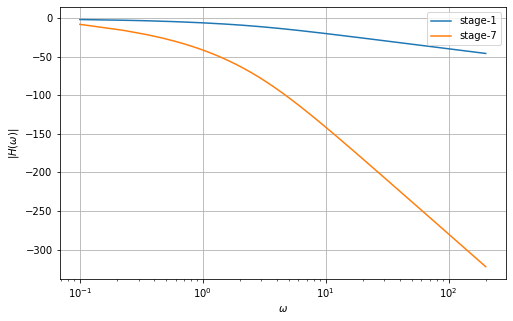

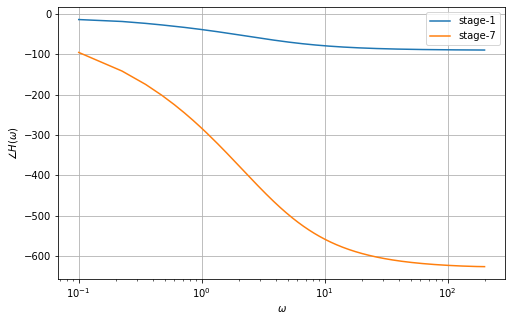

In [9]:
ws = np.linspace(0.1, 200, 1600)
wf, magf, phasef = tf1f.bode(ws)
wa, maga, phasea = tf1a.bode(ws)
plt.figure(figsize=(8,5))
plt.semilogx(wa, maga, label = r'stage-1')    # Bode magnitude plot system 1
plt.semilogx(wf, magf, label = r'stage-7')    # Bode magnitude plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.grid(True)
plt.legend()
plt.figure(figsize=(8,5))
plt.semilogx(wa, phasea, label = r'stage-1')  # Bode phase plot system 1
plt.semilogx(wf, phasef, label = r'stage-7')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of the system (in the time-domain)

Calculate and show the step-respons of the system for each of the stages.

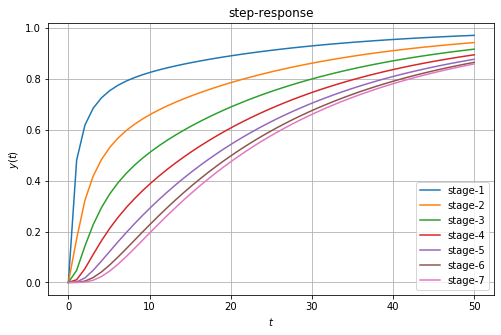

In [10]:
sys2 = sig.lti(a, b, c, d)
t = np.linspace(0., 50.)
u = np.ones_like(t)
tout, y, x = sig.lsim(sys2, u, t)
plt.figure(figsize=(8,5))
for n in range(7): 
    plt.plot(t, y[:,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.title('step-response')
plt.grid(True)
plt.show()


Same for the impulse-response.

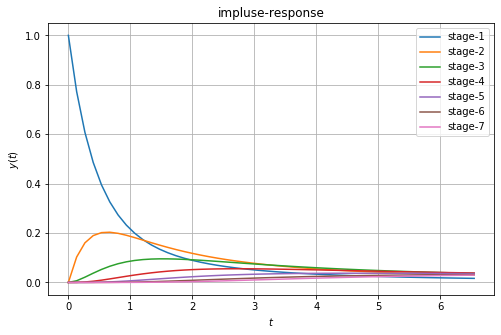

In [11]:
t2 = np.linspace(0., 10.,num=600)
u2 = np.ones_like(t2)
tout2, y2 = sig.impulse(sys2,N=1200)
plt.figure(figsize=(8,5))
for n in range(7):
    plt.plot(tout2[:50],y2[:50,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.grid(True)
plt.title('impluse-response')
plt.show()